<a href="https://colab.research.google.com/github/Abirami-Baskaran-s/Business-Analytics-and-Operations-Intelligence/blob/main/Business_Analytics_ML_Project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Business Analytics & Operations Intelligence

Overview
This notebook demonstrates how data analytics and machine learning techniques can be applied to solve real-world business and operational problems.

Rather than focusing only on algorithms, this project emphasizes:
- Business context
- Decision-making support
- Actionable insights

The analyses simulate scenarios commonly faced by organizations across marketing, operations, HR, and customer analytics.


In [ ]:
  Business Objectives
- Understand the impact of marketing spend on sales performance
- Identify customers at risk of churn
- Evaluate factors influencing employee performance
- Predict product quality using operational data
- Segment customers for targeted strategies
- Identify key features that drive business success


In [ ]:
  Tools & Technologies
- Python
- Pandas & NumPy for data manipulation
- Scikit-learn for machine learning
- Matplotlib & Seaborn for visualization
- Jupyter Notebook for analysis and reporting


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [ ]:
  Use Case 1: Sales Forecasting using Linear Regression

Business Context

Understanding how marketing spend impacts sales is critical for budget allocation and ROI measurement.
This analysis helps decision-makers estimate expected revenue returns from marketing investments.


In [ ]:
Business Insight

The model shows a strong positive relationship between marketing spend and sales.

Key takeaway:
- For every $1 increase in marketing spend, sales increase by approximately $1.18.
- This insight supports data-driven marketing budget planning and ROI estimation.



LINEAR REGRESSION VISUALIZATIONS


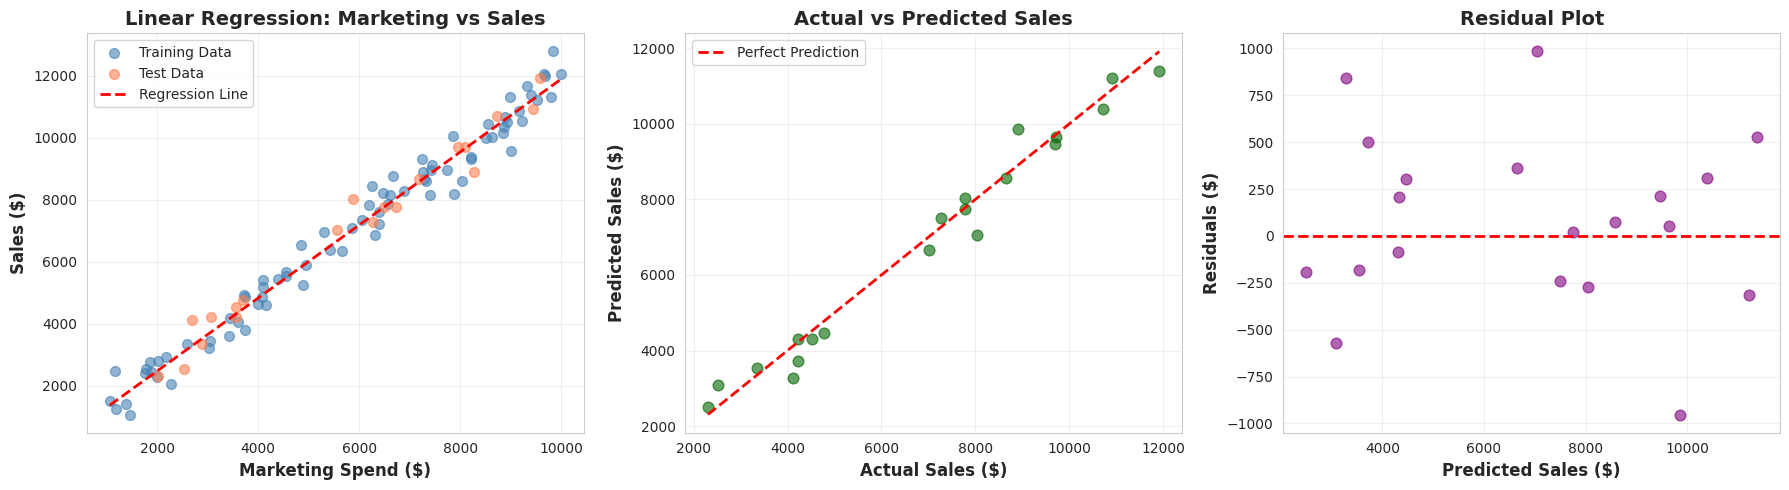

✓ Linear Regression visualizations created
  R² Score: 0.975
  Coefficient: $1.18 sales per $1 marketing


In [4]:
from sklearn.metrics import r2_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


print("\n" + "=" * 70)
print("LINEAR REGRESSION VISUALIZATIONS")
print("=" * 70)

np.random.seed(42)
marketing_spend = np.random.randint(1000, 10000, 100)
sales = marketing_spend * 1.2 + np.random.normal(0, 500, 100)

df_sales = pd.DataFrame({
    'Marketing_Spend': marketing_spend,
    'Sales': sales
})

X = df_sales[['Marketing_Spend']]
y = df_sales['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


fig, axes = plt.subplots(1, 3, figsize=(18, 5))


axes[0].scatter(X_train, y_train, alpha=0.6, color='steelblue', label='Training Data', s=50)
axes[0].scatter(X_test, y_test, alpha=0.6, color='coral', label='Test Data', s=50)
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = lr_model.predict(X_range)
axes[0].plot(X_range, y_range, 'r--', linewidth=2, label='Regression Line')
axes[0].set_xlabel('Marketing Spend ($)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Sales ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Linear Regression: Marketing vs Sales', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


axes[1].scatter(y_test, y_pred, alpha=0.6, color='darkgreen', s=60)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Sales ($)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted Sales ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Actual vs Predicted Sales', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)


residuals = y_test - y_pred
axes[2].scatter(y_pred, residuals, alpha=0.6, color='purple', s=60)
axes[2].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[2].set_xlabel('Predicted Sales ($)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residuals ($)', fontsize=12, fontweight='bold')
axes[2].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('1_linear_regression.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Linear Regression visualizations created")
print(f"  R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"  Coefficient: ${lr_model.coef_[0]:.2f} sales per $1 marketing")


In [ ]:
  Use Case 2: Customer Churn Prediction using Logistic Regression

Business Context

Customer churn directly impacts revenue and growth.
By identifying customers at high risk of churn, organizations can implement proactive retention strategies.


In [ ]:
Business Insight

The model predicts customer churn with high accuracy.

Business implications:
- High-risk customers can be prioritized for retention campaigns
- Marketing and support resources can be allocated more effectively
- Reduces customer acquisition costs by improving retention



LOGISTIC REGRESSION VISUALIZATIONS


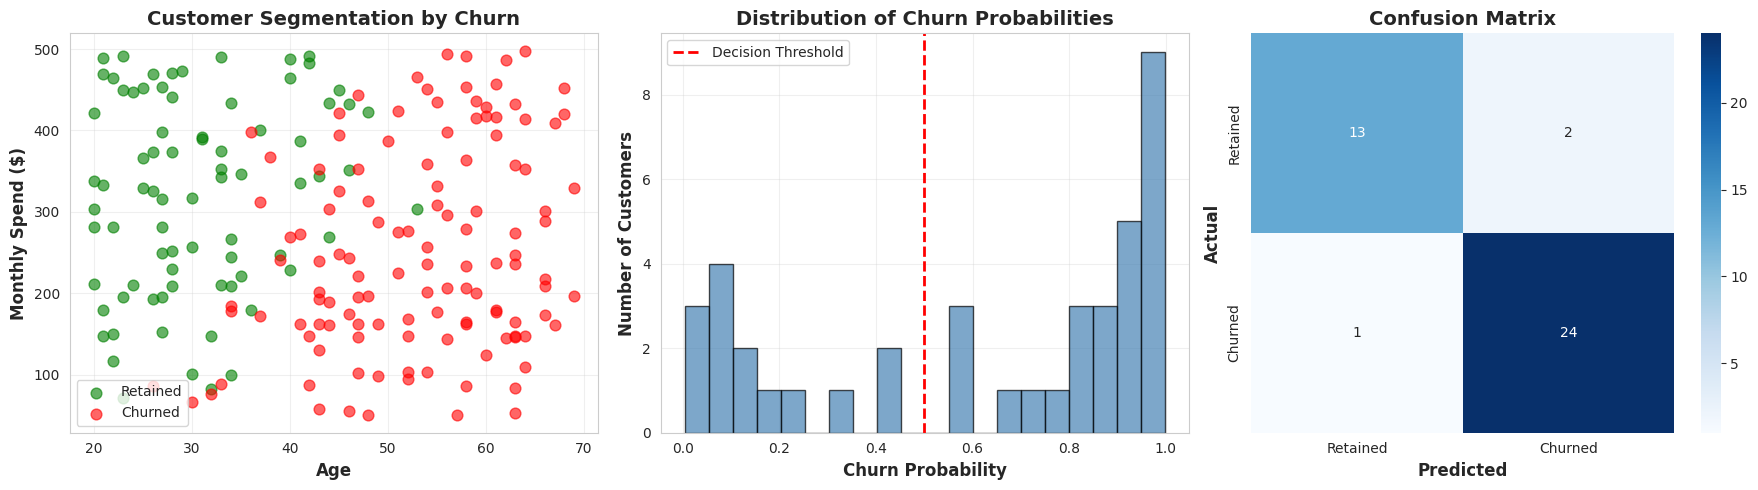

✓ Logistic Regression visualizations created
  Accuracy: 92.5%
  Churn Rate: 61.0%


In [5]:
print("\n" + "=" * 70)
print("LOGISTIC REGRESSION VISUALIZATIONS")
print("=" * 70)

np.random.seed(42)
n_customers = 200
age = np.random.randint(20, 70, n_customers)
monthly_spend = np.random.randint(50, 500, n_customers)

churn_prob = (age * 0.02 - monthly_spend * 0.001 + np.random.normal(0, 0.1, n_customers))
churn = (churn_prob > 0.5).astype(int)

df_churn = pd.DataFrame({
    'Age': age,
    'Monthly_Spend': monthly_spend,
    'Churn': churn
})

X = df_churn[['Age', 'Monthly_Spend']]
y = df_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))


churned = df_churn[df_churn['Churn'] == 1]
retained = df_churn[df_churn['Churn'] == 0]
axes[0].scatter(retained['Age'], retained['Monthly_Spend'], alpha=0.6,
                color='green', label='Retained', s=60)
axes[0].scatter(churned['Age'], churned['Monthly_Spend'], alpha=0.6,
                color='red', label='Churned', s=60)
axes[0].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Monthly Spend ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Customer Segmentation by Churn', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


axes[1].hist(y_pred_proba, bins=20, alpha=0.7, color='steelblue', edgecolor='black')
axes[1].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
axes[1].set_xlabel('Churn Probability', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Churn Probabilities', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[2],
            xticklabels=['Retained', 'Churned'],
            yticklabels=['Retained', 'Churned'], cbar=True)
axes[2].set_xlabel('Predicted', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Actual', fontsize=12, fontweight='bold')
axes[2].set_title('Confusion Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('2_logistic_regression.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Logistic Regression visualizations created")
print(f"  Accuracy: {accuracy_score(y_test, y_pred):.1%}")
print(f"  Churn Rate: {churn.mean():.1%}")

In [ ]:
  Use Case 3: Employee Performance Classification

Business Context

Employee performance directly affects productivity and operational efficiency.
This analysis helps HR teams understand which factors influence performance outcomes.


In [ ]:
Business Insight

Training hours and experience are key drivers of employee performance.

Practical usage:
- Supports training investment decisions
- Helps identify employees who may benefit from additional development
- Enables fair and explainable performance evaluation


DECISION TREE - EMPLOYEE PERFORMANCE CLASSIFICATION

📊 Dataset Overview:
  Total Employees: 150
  Performance Distribution:
    Poor: 38 (25.3%)
    Average: 86 (57.3%)
    Excellent: 26 (17.3%)

🎯 Decision Tree Performance:
  Accuracy: 80.0%

  Classification Report:
              precision    recall  f1-score   support

        Poor       0.86      0.60      0.71        10
     Average       0.75      0.94      0.83        16
   Excellent       1.00      0.75      0.86         4

    accuracy                           0.80        30
   macro avg       0.87      0.76      0.80        30
weighted avg       0.82      0.80      0.79        30



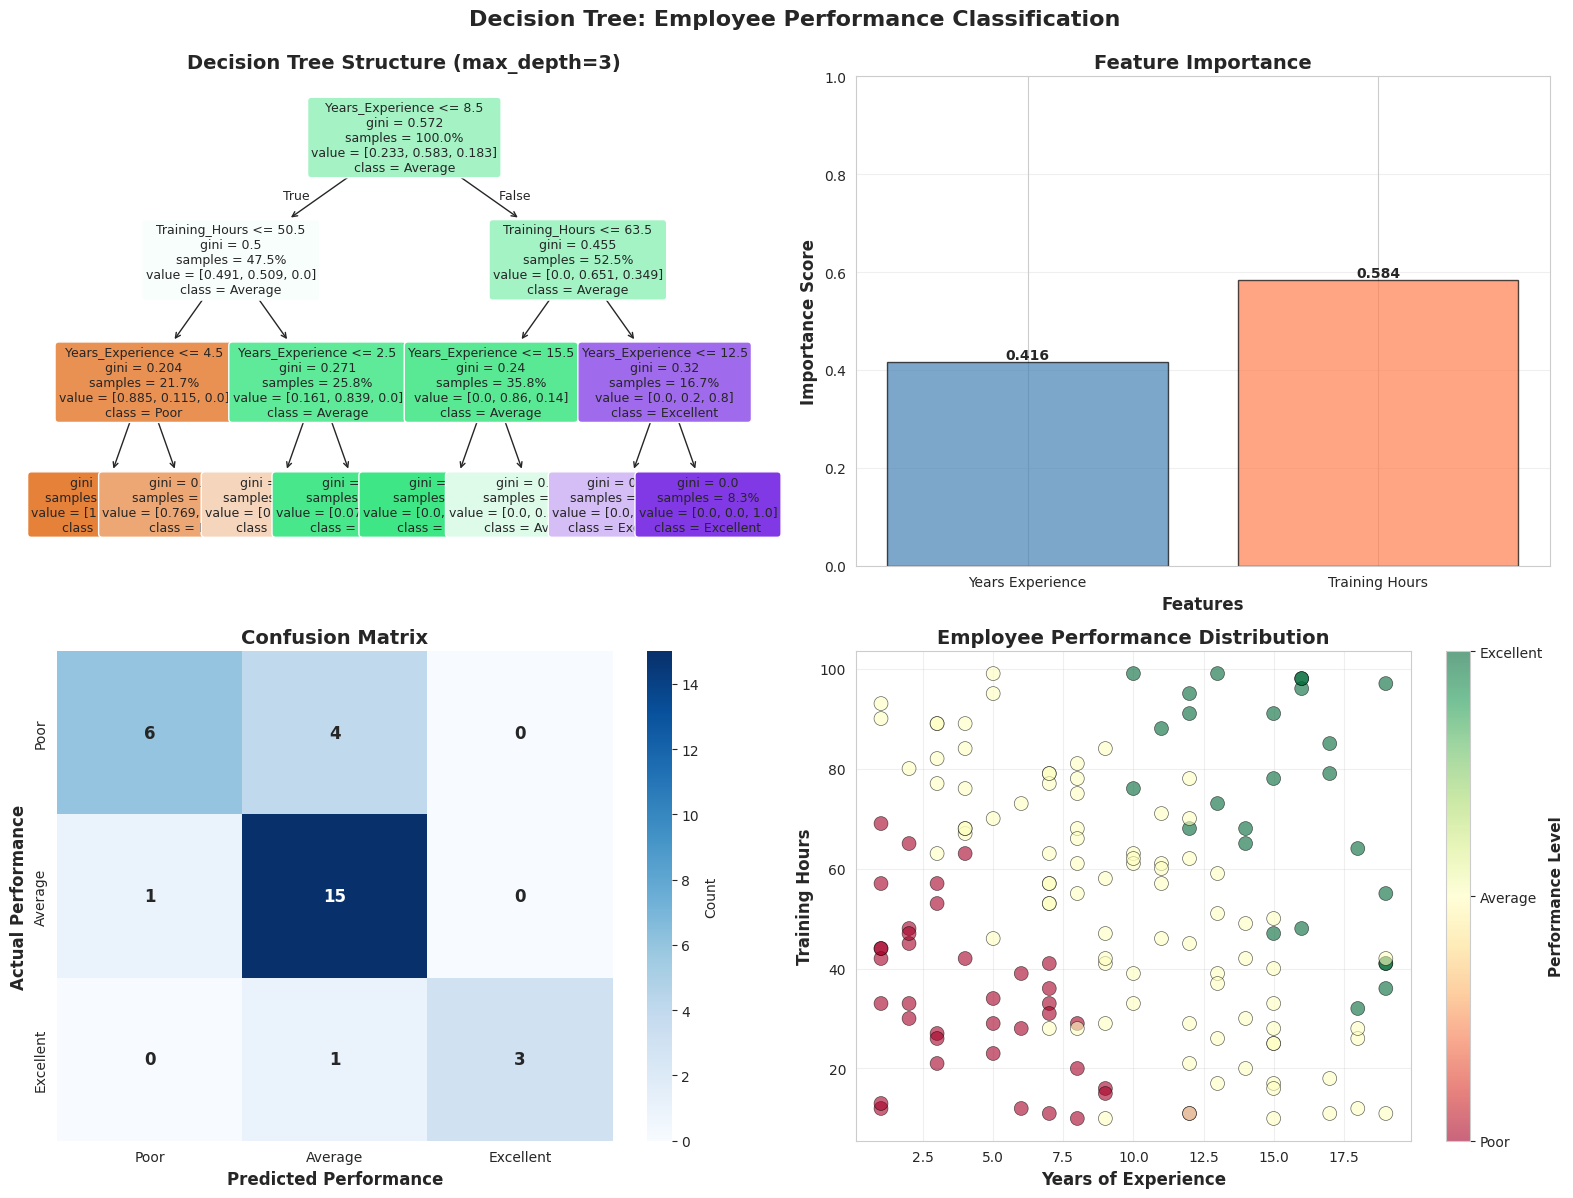


✓ Decision Tree visualizations created

💡 Key Insights:
  - Most important feature: Training Hours
  - Tree depth: 3
  - Number of leaves: 8
  - Decision tree provides interpretable rules for performance prediction


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10

print("=" * 70)
print("DECISION TREE - EMPLOYEE PERFORMANCE CLASSIFICATION")
print("=" * 70)


np.random.seed(42)
n_employees = 150
years_experience = np.random.randint(1, 20, n_employees)
training_hours = np.random.randint(10, 100, n_employees)


performance_score = (years_experience * 3 + training_hours * 0.5 + np.random.normal(0, 5, n_employees))
performance = pd.cut(performance_score, bins=3, labels=[0, 1, 2]).astype(int)

df_performance = pd.DataFrame({
    'Years_Experience': years_experience,
    'Training_Hours': training_hours,
    'Performance': performance
})

print(f"\n📊 Dataset Overview:")
print(f"  Total Employees: {len(df_performance)}")
print(f"  Performance Distribution:")
for level, name in enumerate(['Poor', 'Average', 'Excellent']):
    count = (performance == level).sum()
    print(f"    {name}: {count} ({count/len(df_performance)*100:.1f}%)")


X = df_performance[['Years_Experience', 'Training_Hours']]
y = df_performance['Performance']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"\n🎯 Decision Tree Performance:")
print(f"  Accuracy: {dt_accuracy:.1%}")
print(f"\n  Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Poor', 'Average', 'Excellent']))


fig, axes = plt.subplots(2, 2, figsize=(16, 12))


plot_tree(dt_model,
          feature_names=['Years_Experience', 'Training_Hours'],
          class_names=['Poor', 'Average', 'Excellent'],
          filled=True,
          ax=axes[0, 0],
          fontsize=9,
          rounded=True,
          proportion=True)
axes[0, 0].set_title('Decision Tree Structure (max_depth=3)', fontsize=14, fontweight='bold')


features = ['Years Experience', 'Training Hours']
dt_importance = dt_model.feature_importances_
colors_imp = ['steelblue', 'coral']
bars = axes[0, 1].bar(features, dt_importance, color=colors_imp, alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Features', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Importance Score', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Feature Importance', fontsize=14, fontweight='bold')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(True, alpha=0.3, axis='y')


for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontweight='bold')


performance_labels = ['Poor', 'Average', 'Excellent']
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=performance_labels,
            yticklabels=performance_labels,
            ax=axes[1, 0],
            cbar_kws={'label': 'Count'},
            annot_kws={'size': 12, 'weight': 'bold'})
axes[1, 0].set_xlabel('Predicted Performance', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Actual Performance', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')


axes[1, 1].scatter(df_performance['Years_Experience'],
                   df_performance['Training_Hours'],
                   c=df_performance['Performance'],
                   cmap='RdYlGn',
                   s=100,
                   alpha=0.6,
                   edgecolors='black',
                   linewidth=0.5)
axes[1, 1].set_xlabel('Years of Experience', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Training Hours', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Employee Performance Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)


cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
cbar.set_label('Performance Level', fontsize=11, fontweight='bold')
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Poor', 'Average', 'Excellent'])

plt.suptitle('Decision Tree: Employee Performance Classification',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('3_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Decision Tree visualizations created")
print(f"\n💡 Key Insights:")
print(f"  - Most important feature: {features[np.argmax(dt_importance)]}")
print(f"  - Tree depth: {dt_model.get_depth()}")
print(f"  - Number of leaves: {dt_model.get_n_leaves()}")
print(f"  - Decision tree provides interpretable rules for performance prediction")

In [ ]:
  Use Case 4: Performance Optimization using Random Forest

Business Context

Ensemble models often improve prediction accuracy and reduce bias.
This model enhances performance prediction reliability.


In [ ]:
Business Insight

The Random Forest model improves prediction accuracy over the single Decision Tree.

Business value:
- More reliable performance predictions
- Better support for HR and workforce planning decisions


RANDOM FOREST - EMPLOYEE PERFORMANCE CLASSIFICATION

📊 Dataset Overview:
  Total Employees: 150
  Performance Distribution:
    Poor: 38 (25.3%)
    Average: 86 (57.3%)
    Excellent: 26 (17.3%)

🎯 Random Forest Performance:
  Number of Trees: 100
  Accuracy: 90.0%

  Classification Report:
              precision    recall  f1-score   support

        Poor       1.00      0.70      0.82        10
     Average       0.84      1.00      0.91        16
   Excellent       1.00      1.00      1.00         4

    accuracy                           0.90        30
   macro avg       0.95      0.90      0.91        30
weighted avg       0.92      0.90      0.90        30



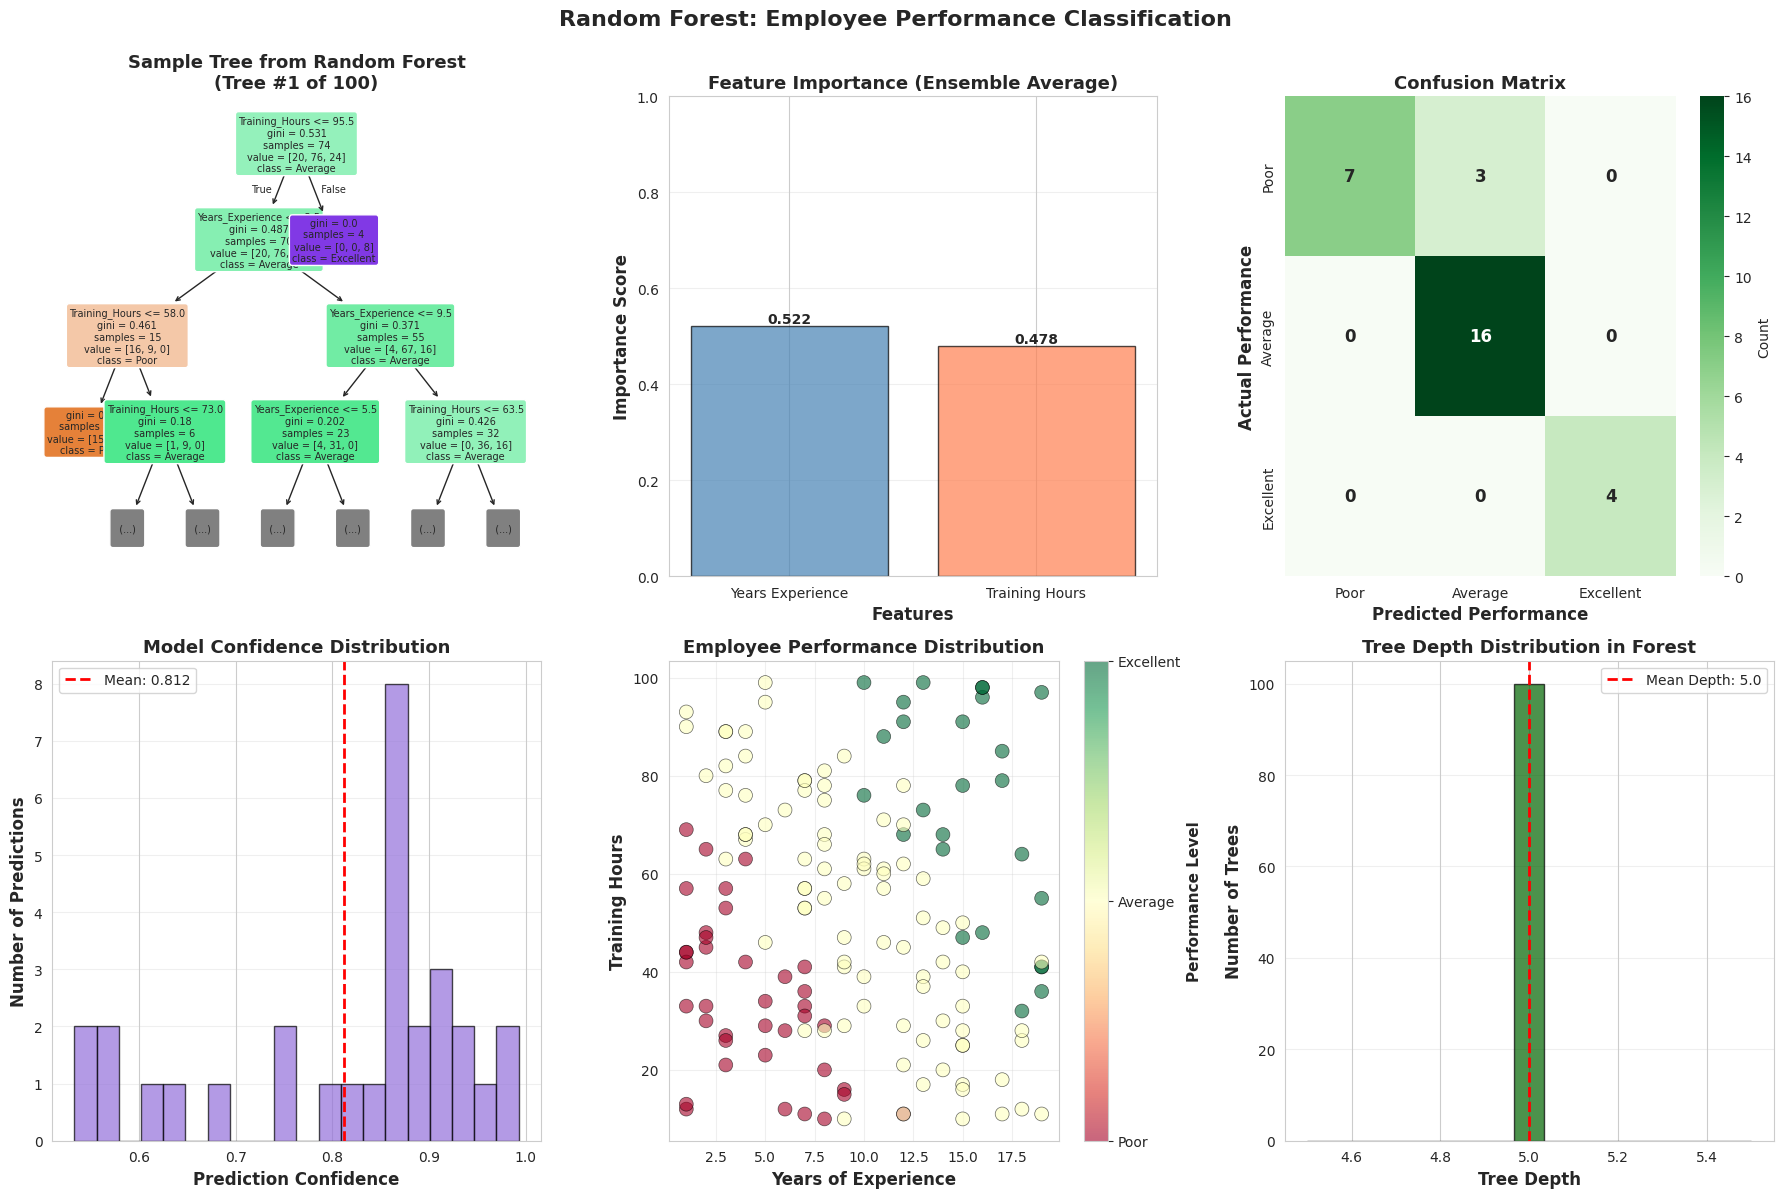


✓ Random Forest visualizations created

💡 Key Insights:
  - Most important feature: Years Experience
  - Average tree depth: 5.0
  - Average prediction confidence: 81.2%
  - Random Forest reduces overfitting through ensemble learning
  - Better generalization than single decision tree


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10

print("=" * 70)
print("RANDOM FOREST - EMPLOYEE PERFORMANCE CLASSIFICATION")
print("=" * 70)


np.random.seed(42)
n_employees = 150
years_experience = np.random.randint(1, 20, n_employees)
training_hours = np.random.randint(10, 100, n_employees)


performance_score = (years_experience * 3 + training_hours * 0.5 + np.random.normal(0, 5, n_employees))
performance = pd.cut(performance_score, bins=3, labels=[0, 1, 2]).astype(int)

df_performance = pd.DataFrame({
    'Years_Experience': years_experience,
    'Training_Hours': training_hours,
    'Performance': performance
})

print(f"\n📊 Dataset Overview:")
print(f"  Total Employees: {len(df_performance)}")
print(f"  Performance Distribution:")
for level, name in enumerate(['Poor', 'Average', 'Excellent']):
    count = (performance == level).sum()
    print(f"    {name}: {count} ({count/len(df_performance)*100:.1f}%)")


X = df_performance[['Years_Experience', 'Training_Hours']]
y = df_performance['Performance']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)


rf_accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\n🎯 Random Forest Performance:")
print(f"  Number of Trees: {rf_model.n_estimators}")
print(f"  Accuracy: {rf_accuracy:.1%}")
print(f"\n  Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Poor', 'Average', 'Excellent']))


fig, axes = plt.subplots(2, 3, figsize=(18, 12))


sample_tree = rf_model.estimators_[0]
plot_tree(sample_tree,
          feature_names=['Years_Experience', 'Training_Hours'],
          class_names=['Poor', 'Average', 'Excellent'],
          filled=True,
          ax=axes[0, 0],
          fontsize=7,
          rounded=True,
          max_depth=3)
axes[0, 0].set_title('Sample Tree from Random Forest\n(Tree #1 of 100)',
                     fontsize=13, fontweight='bold')


features = ['Years Experience', 'Training Hours']
rf_importance = rf_model.feature_importances_
colors_imp = ['steelblue', 'coral']
bars = axes[0, 1].bar(features, rf_importance, color=colors_imp, alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Features', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Importance Score', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Feature Importance (Ensemble Average)', fontsize=13, fontweight='bold')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(True, alpha=0.3, axis='y')


for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontweight='bold')


performance_labels = ['Poor', 'Average', 'Excellent']
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=performance_labels,
            yticklabels=performance_labels,
            ax=axes[0, 2],
            cbar_kws={'label': 'Count'},
            annot_kws={'size': 12, 'weight': 'bold'})
axes[0, 2].set_xlabel('Predicted Performance', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Actual Performance', fontsize=12, fontweight='bold')
axes[0, 2].set_title('Confusion Matrix', fontsize=13, fontweight='bold')


avg_confidence = np.max(y_pred_proba, axis=1)
axes[1, 0].hist(avg_confidence, bins=20, color='mediumpurple', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(avg_confidence.mean(), color='red', linestyle='--',
                   linewidth=2, label=f'Mean: {avg_confidence.mean():.3f}')
axes[1, 0].set_xlabel('Prediction Confidence', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Number of Predictions', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Model Confidence Distribution', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')


scatter = axes[1, 1].scatter(df_performance['Years_Experience'],
                             df_performance['Training_Hours'],
                             c=df_performance['Performance'],
                             cmap='RdYlGn',
                             s=100,
                             alpha=0.6,
                             edgecolors='black',
                             linewidth=0.5)
axes[1, 1].set_xlabel('Years of Experience', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Training Hours', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Employee Performance Distribution', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)


cbar = plt.colorbar(scatter, ax=axes[1, 1])
cbar.set_label('Performance Level', fontsize=11, fontweight='bold')
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Poor', 'Average', 'Excellent'])


tree_depths = [tree.get_depth() for tree in rf_model.estimators_]
axes[1, 2].hist(tree_depths, bins=15, color='darkgreen', alpha=0.7, edgecolor='black')
axes[1, 2].axvline(np.mean(tree_depths), color='red', linestyle='--',
                   linewidth=2, label=f'Mean Depth: {np.mean(tree_depths):.1f}')
axes[1, 2].set_xlabel('Tree Depth', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Number of Trees', fontsize=12, fontweight='bold')
axes[1, 2].set_title('Tree Depth Distribution in Forest', fontsize=13, fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.suptitle('Random Forest: Employee Performance Classification',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('4_random_forest.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Random Forest visualizations created")
print(f"\n💡 Key Insights:")
print(f"  - Most important feature: {features[np.argmax(rf_importance)]}")
print(f"  - Average tree depth: {np.mean(tree_depths):.1f}")
print(f"  - Average prediction confidence: {avg_confidence.mean():.1%}")
print(f"  - Random Forest reduces overfitting through ensemble learning")
print(f"  - Better generalization than single decision tree")

In [ ]:
   Use Case 5: Product Quality Classification using SVM

Business Context

Maintaining product quality is critical for customer satisfaction and compliance.
This model helps classify products as pass/fail based on operational parameters.


In [ ]:
Business Insight

The SVM model accurately classifies product quality.

Operational impact:
- Enables early detection of quality issues
- Reduces waste and rework costs
- Supports quality assurance processes



SVM VISUALIZATIONS


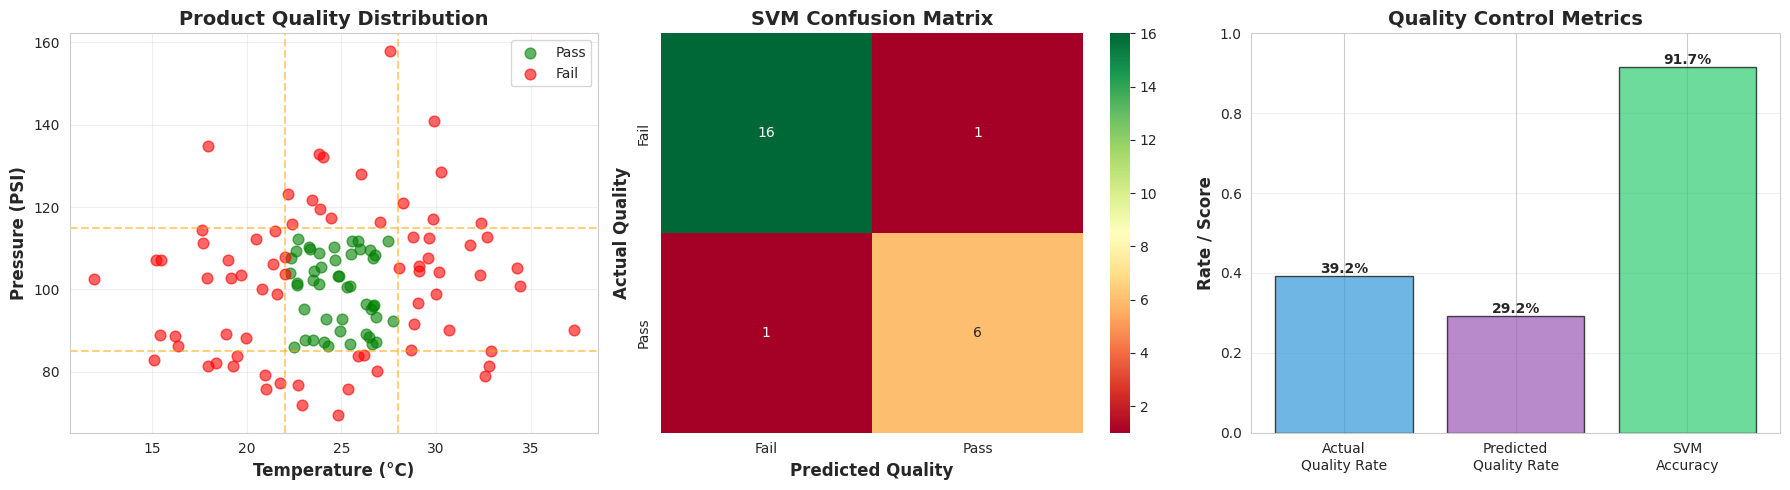

✓ SVM visualizations created
  Accuracy: 91.7%
  Quality Pass Rate: 39.2%


In [10]:
print("\n" + "=" * 70)
print("SVM VISUALIZATIONS")
print("=" * 70)

np.random.seed(42)
n_products = 120
temperature = np.random.normal(25, 5, n_products)
pressure = np.random.normal(100, 15, n_products)

quality = ((temperature > 22) & (temperature < 28) &
           (pressure > 85) & (pressure < 115)).astype(int)

df_quality = pd.DataFrame({
    'Temperature': temperature,
    'Pressure': pressure,
    'Quality': quality
})

X = df_quality[['Temperature', 'Pressure']]
y = df_quality['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))


pass_products = df_quality[df_quality['Quality'] == 1]
fail_products = df_quality[df_quality['Quality'] == 0]
axes[0].scatter(pass_products['Temperature'], pass_products['Pressure'],
                alpha=0.6, color='green', label='Pass', s=60)
axes[0].scatter(fail_products['Temperature'], fail_products['Pressure'],
                alpha=0.6, color='red', label='Fail', s=60)
axes[0].set_xlabel('Temperature (°C)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Pressure (PSI)', fontsize=12, fontweight='bold')
axes[0].set_title('Product Quality Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


axes[0].axvline(x=22, color='orange', linestyle='--', alpha=0.5, label='Quality Boundaries')
axes[0].axvline(x=28, color='orange', linestyle='--', alpha=0.5)
axes[0].axhline(y=85, color='orange', linestyle='--', alpha=0.5)
axes[0].axhline(y=115, color='orange', linestyle='--', alpha=0.5)


cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='RdYlGn', ax=axes[1],
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'], cbar=True)
axes[1].set_xlabel('Predicted Quality', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Actual Quality', fontsize=12, fontweight='bold')
axes[1].set_title('SVM Confusion Matrix', fontsize=14, fontweight='bold')


quality_rate = quality.mean()
predicted_quality_rate = y_pred_svm.mean()
metrics = ['Actual\nQuality Rate', 'Predicted\nQuality Rate', 'SVM\nAccuracy']
values = [quality_rate, predicted_quality_rate, accuracy_score(y_test, y_pred_svm)]
colors_metrics = ['#3498db', '#9b59b6', '#2ecc71']
bars = axes[2].bar(metrics, values, color=colors_metrics, alpha=0.7, edgecolor='black')
axes[2].set_ylabel('Rate / Score', fontsize=12, fontweight='bold')
axes[2].set_title('Quality Control Metrics', fontsize=14, fontweight='bold')
axes[2].set_ylim([0, 1])
axes[2].grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('5_svm.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ SVM visualizations created")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_svm):.1%}")
print(f"  Quality Pass Rate: {quality.mean():.1%}")

In [ ]:
  Use Case 6: Customer Segmentation using K-Means Clustering

Business Context

Customer segmentation allows businesses to tailor pricing, marketing, and engagement strategies.
This analysis groups customers based on income and spending behavior.


In [ ]:
Business Insight

Customers were grouped into three distinct segments:
- Budget Conscious
- Middle Market
- Premium

Business applications:
- Personalized marketing strategies
- Optimized pricing models
- Improved customer experience



K-MEANS CLUSTERING VISUALIZATIONS


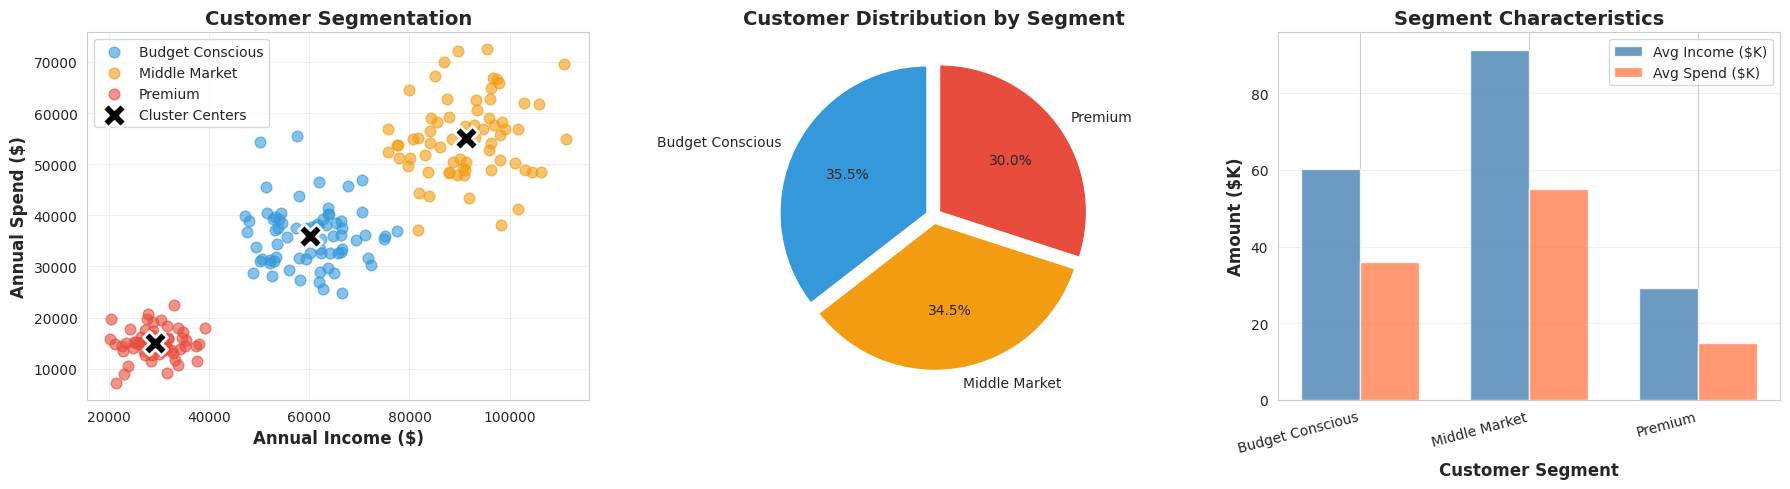

✓ K-Means Clustering visualizations created
  Segments Discovered: 3
  Budget Conscious: 71 customers (35.5%)
  Middle Market: 69 customers (34.5%)
  Premium: 60 customers (30.0%)


In [11]:
print("\n" + "=" * 70)
print("K-MEANS CLUSTERING VISUALIZATIONS")
print("=" * 70)

np.random.seed(42)
segment1_income = np.random.normal(30000, 5000, 60)
segment1_spend = np.random.normal(15000, 3000, 60)
segment2_income = np.random.normal(60000, 8000, 70)
segment2_spend = np.random.normal(35000, 5000, 70)
segment3_income = np.random.normal(90000, 10000, 70)
segment3_spend = np.random.normal(55000, 8000, 70)

annual_income = np.concatenate([segment1_income, segment2_income, segment3_income])
annual_spend = np.concatenate([segment1_spend, segment2_spend, segment3_spend])

df_customers = pd.DataFrame({
    'Annual_Income': annual_income,
    'Annual_Spend': annual_spend
})

X = df_customers[['Annual_Income', 'Annual_Spend']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)
df_customers['Cluster'] = clusters

fig, axes = plt.subplots(1, 3, figsize=(18, 5))


segment_names = ['Budget Conscious', 'Middle Market', 'Premium']
colors_segments = ['#3498db', '#f39c12', '#e74c3c']

for i in range(3):
    cluster_data = df_customers[df_customers['Cluster'] == i]
    axes[0].scatter(cluster_data['Annual_Income'], cluster_data['Annual_Spend'],
                   alpha=0.6, color=colors_segments[i], label=segment_names[i], s=60)


centers = kmeans.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=300,
               edgecolor='white', linewidth=2, label='Cluster Centers')
axes[0].set_xlabel('Annual Income ($)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Annual Spend ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Customer Segmentation', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


cluster_counts = df_customers['Cluster'].value_counts().sort_index()
axes[1].pie(cluster_counts.values, labels=segment_names, autopct='%1.1f%%',
           colors=colors_segments, startangle=90, explode=(0.05, 0.05, 0.05))
axes[1].set_title('Customer Distribution by Segment', fontsize=14, fontweight='bold')


x_pos = np.arange(len(segment_names))
avg_income = [centers[i, 0] for i in range(3)]
avg_spend = [centers[i, 1] for i in range(3)]

width = 0.35
axes[2].bar(x_pos - width/2, [x/1000 for x in avg_income], width,
           label='Avg Income ($K)', color='steelblue', alpha=0.8)
axes[2].bar(x_pos + width/2, [x/1000 for x in avg_spend], width,
           label='Avg Spend ($K)', color='coral', alpha=0.8)
axes[2].set_xlabel('Customer Segment', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Amount ($K)', fontsize=12, fontweight='bold')
axes[2].set_title('Segment Characteristics', fontsize=14, fontweight='bold')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(segment_names, rotation=15, ha='right')
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('6_kmeans_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ K-Means Clustering visualizations created")
print(f"  Segments Discovered: {len(np.unique(clusters))}")
for i, name in enumerate(segment_names):
    count = cluster_counts.iloc[i]
    print(f"  {name}: {count} customers ({count/len(df_customers)*100:.1f}%)")

In [ ]:
  Use Case 7: Data Preprocessing & Feature Selection

Business Context

Not all data contributes equally to business outcomes.
Feature selection helps focus analytics on metrics that truly drive success.


In [ ]:
Business Insight

Revenue and marketing spend show the strongest relationship with business success.

Strategic benefit:
- Reduces noise in analytics
- Improves model interpretability
- Supports focused KPI tracking



FEATURE SELECTION VISUALIZATIONS


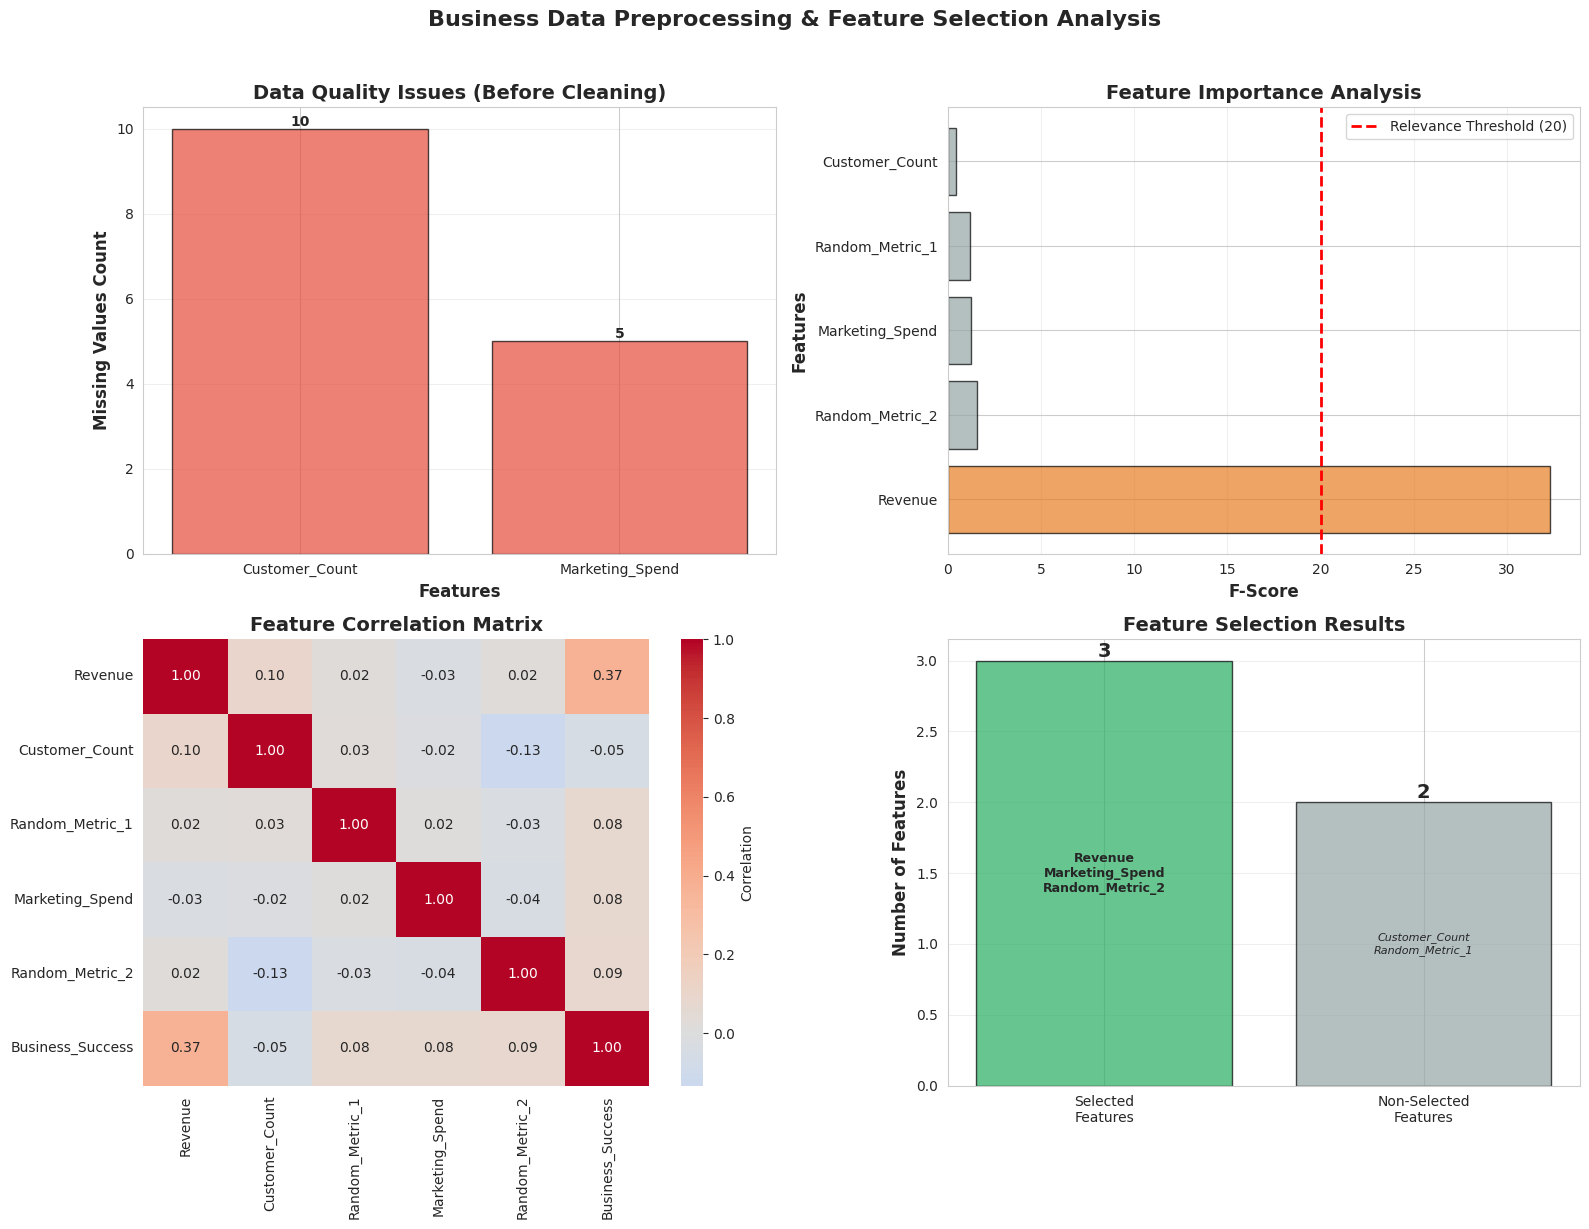

In [12]:
print("\n" + "=" * 70)
print("FEATURE SELECTION VISUALIZATIONS")
print("=" * 70)

np.random.seed(42)
n_samples = 200

revenue = np.random.normal(500000, 100000, n_samples)
customers = np.random.normal(1000, 200, n_samples)
random_metric1 = np.random.random(n_samples) * 100
marketing_spend = np.random.normal(50000, 15000, n_samples)
random_metric2 = np.random.random(n_samples) * 50

success_score = (revenue * 0.00001 + marketing_spend * 0.00002 + np.random.normal(0, 2, n_samples))
business_success = (success_score > np.median(success_score)).astype(int)

df_business = pd.DataFrame({
    'Revenue': revenue,
    'Customer_Count': customers,
    'Random_Metric_1': random_metric1,
    'Marketing_Spend': marketing_spend,
    'Random_Metric_2': random_metric2,
    'Business_Success': business_success
})


missing_indices = np.random.choice(df_business.index, 15, replace=False)
df_business.loc[missing_indices[:10], 'Customer_Count'] = np.nan
df_business.loc[missing_indices[10:], 'Marketing_Spend'] = np.nan

missing_before = df_business.isnull().sum()

df_business['Customer_Count'].fillna(df_business['Customer_Count'].median(), inplace=True)
df_business['Marketing_Spend'].fillna(df_business['Marketing_Spend'].mean(), inplace=True)


X = df_business.drop('Business_Success', axis=1)
y = df_business['Business_Success']

selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Score': selector.scores_
}).sort_values('Importance_Score', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))


features_with_missing = ['Customer_Count', 'Marketing_Spend']
missing_counts = [missing_before[f] for f in features_with_missing]
x_pos = np.arange(len(features_with_missing))

axes[0, 0].bar(x_pos, missing_counts, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Features', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Missing Values Count', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Data Quality Issues (Before Cleaning)', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(features_with_missing)
axes[0, 0].grid(True, alpha=0.3, axis='y')

for i, count in enumerate(missing_counts):
    axes[0, 0].text(i, count, str(count), ha='center', va='bottom', fontweight='bold')


colors_importance = ['#27ae60' if score > 50 else '#e67e22' if score > 20 else '#95a5a6'
                     for score in feature_scores['Importance_Score']]
axes[0, 1].barh(feature_scores['Feature'], feature_scores['Importance_Score'],
                color=colors_importance, alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('F-Score', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Features', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Feature Importance Analysis', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')


threshold = 20
axes[0, 1].axvline(x=threshold, color='red', linestyle='--', linewidth=2,
                   label=f'Relevance Threshold ({threshold})')
axes[0, 1].legend()


correlation_matrix = df_business.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
           center=0, ax=axes[1, 0], cbar_kws={'label': 'Correlation'})
axes[1, 0].set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')


selected_mask = selector.get_support()
selected_features = X.columns[selected_mask].tolist()
non_selected_features = X.columns[~selected_mask].tolist()

categories = ['Selected\nFeatures', 'Non-Selected\nFeatures']
counts = [len(selected_features), len(non_selected_features)]
colors_selection = ['#27ae60', '#95a5a6']

bars = axes[1, 1].bar(categories, counts, color=colors_selection, alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Number of Features', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Feature Selection Results', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, counts):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   str(count), ha='center', va='bottom', fontweight='bold', fontsize=14)


axes[1, 1].text(0, counts[0]*0.5, '\n'.join(selected_features),
               ha='center', va='center', fontsize=9, fontweight='bold')
axes[1, 1].text(1, counts[1]*0.5, '\n'.join(non_selected_features),
               ha='center', va='center', fontsize=8, style='italic')

plt.suptitle('Business Data Preprocessing & Feature Selection Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('7_feature_selection_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
Executive Summary

This project demonstrates how business analytics and machine learning can support strategic and operational decision-making across multiple domains:

- Revenue growth
- Customer retention
- Workforce optimization
- Product quality assurance
- Market segmentation

The analyses emphasize interpretability, relevance, and business value—key competencies for Business Analysts and Operations Analysts.
